---

<div class="alert alert-success">

<center><b>University of Ghardaia</b></center>
    
<center><i>Faculty of Science and Technology - Department of Mathematics and Computer Science – Master 1 SIEC - 2023/2024</i>
</center></div>

------

<br><br>

<center>
<span style='font-weight:bold;font-size:27px;'><span style='color:#5D00FF;'>Practical work 1 - ML : Linear regression </span>
    </span>
    </center>
<br>


The goal of this work is to learn how to use the gradient descent algorithm on a dataset to create a linear regression model.

In this practical section, we will use Python to create a single-variable linear regression model.
The data set we're going to use contains the height and weight of 200 people.
___

In [1]:
# Importing the required libraries
 
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading data
data = pd.read_csv('hw_200.csv')
print(data.shape)
data.head()


(200, 3)


,Index,Height(Inches),Weight(Pounds)
0,1,65.78,112.99
1,2,71.52,136.49
2,3,69.40,153.03
3,4,68.22,142.34
4,5,67.79,144.30


In [3]:
# Get X and Y
X = data['Height(Inches)'].values
Y = data['Weight(Pounds)'].values

Text(0, 0.5, 'The weight (Pounds)')

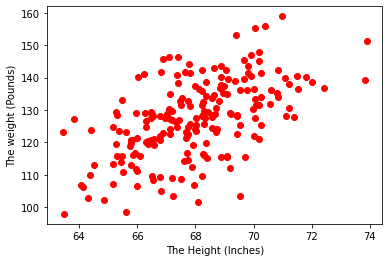

In [7]:
# Visualizing data 
plt.scatter(X,Y, c='red')
plt.xlabel('The Height (Inches)')
plt.ylabel('The weight (Pounds)')


### Let's start with the least squares method :
To find the parameters $b_0$ and $b_1$ of the equation $f(x) = b_0 + b_1x $, We need first to calculate the average of  $\bar{X}$ and $\bar{Y}$.



In [8]:
# Average of X and Y
average_x = np.mean(X)
average_y = np.mean(Y)

To compute $b_0$ and $b_1$

$b_1= \frac{\sum(X-\bar{X})(Y-\bar{Y})}{\sum(X-\bar{X})^2} $ , $b_0=\bar{Y}-b_1\bar{X} \;\;\;\;\;\;\;$    **(1)**


In [9]:
 
# Total number of examples
n = len(X)
 
# Formula (1) is used to calculate b0 and b1
b1= np.sum((X-average_x)*(Y-average_y)) / np.sum((X-average_x)**2)
b0= average_y - b1 * average_x

print(b0, b1)
print('b0 = {:.2f}'.format(b0))
print('b1 = {:.2f}'.format(b1))


# Show model equation depending on coefficients b0, b1
print('\nThe linear regression model : ',end='')
print('f(x) = {:.2f} +'.format(b0),'{:.2f} X'.format(b1) )

-106.02770644878129 3.4326761292716284
b0 = -106.03
b1 = 3.43

The linear regression model : f(x) = -106.03 + 3.43 X



We'll now plot the scatter plot with the linear regression line. 


Text(0, 0.5, 'The weight (Pounds)')

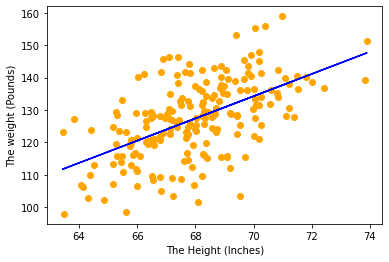

In [10]:
# A vector of predictions is created by the function f(x) 
F_x = b0 + b1 * X

# Visualizing results
plt.scatter(X, Y, c='orange')
plt.plot(X, F_x, c='blue')
plt.xlabel('The Height (Inches)')
plt.ylabel('The weight (Pounds)')

We can now calculate the accuracy of our model by computing *the correlation coefficient $r$* and *the coefficient of determination* $R^2$ between our model $f(x)$ and the $Y$ values of the dataset.

In [11]:
# Calculation of the correlation coefficient 
import math
r = sum((X-average_x)*(Y-average_y))/(math.sqrt(sum((X-average_x)**2))*math.sqrt(sum((Y-average_y)**2)))

print("The correlation coefficient r = ",r)

# Calculation of the coefficient of determination R2
R2 = 1- np.sum((Y-F_x)**2)/np.sum((Y-average_y)**2)
print("Coefficient of determination R2 = ",R2)

The correlation coefficient r =  0.5568647346122992
Coefficient of determination R2 =  0.31009833265482645


### Implementing linear regression with *scikit learn*

Now we'll see how to implement the same model using a machine learning library called **scikit-learn**.

To develop and train a model with **Sklearn**, all we have to do is define a " ***model*** " variable from the *SGDRegressor* generator, entering the *number of iterations* to be performed by the *gradient descent* and the *learning rate*.

Once the model has been defined, we use the **fit** function to train it.

In [24]:
# library import
from sklearn.linear_model import SGDRegressor


# Set the number of iterations and the learning rate
nbr_iter = 100
L_rate = 0.001

# We give X a new shape without any change to its data.  
X_=X.reshape((n, 1))

# Model building with the initialization of the gradient descent algorithm (number of iterations and learning rate)
model = SGDRegressor( max_iter=nbr_iter, eta0=L_rate)

# model training
model.fit(X_,Y)


SGDRegressor(eta0=0.001, max_iter=100)

We can measure the accuracy of our model using the *score* function, which calculates the **coefficient of determination** between the model (Y') and the Y values in the dataset.

The coefficient of determination R2 = -0.03718297213582433
[-349.71985476] [7.03283962]


Text(0, 0.5, 'The weight (Pounds)')

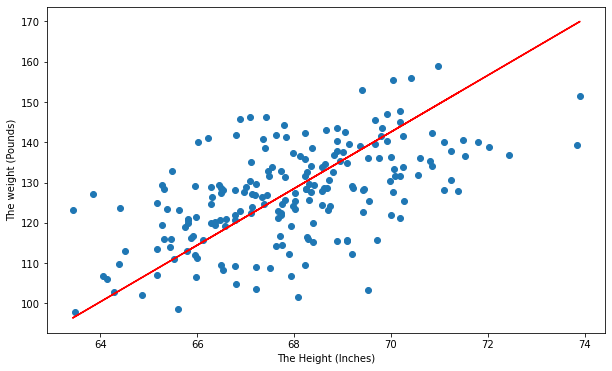

In [25]:
# displaying the R2 coefficient
print('The coefficient of determination R2 =', model.score(X_, Y))

# model coefficients
b_0 = model.intercept_
b_1 = model.coef_
print(b_0, b_1)

plt.rcParams["figure.figsize"] = (10,6)

# displaying the result graph
plt.scatter(X_, Y)
plt.plot(X_, model.predict(X_), c='red')
plt.xlabel('The Height (Inches)')
plt.ylabel('The weight (Pounds)')



We can **predict** the weight of a person with a height of 73 inches (1.85 meters):

In [28]:
print('The weight of a person who is 73 inches tall is : ',model.predict([[73]]))

The weight of a person who is 73 inches tall is :  [163.67743726]


---
## Exercise :




Create a linear regression model in a new Notebook in Jupyter. The file **"linreg_data.csv "** contains data of dimension (250, 2), you'll use it as a *Dataset* for training. 
1. Use the Machine Learning tool **scikit learn** to develop and train the model, as we've learned previously.
2. What is the optimal *Learning Rate* and how many iterations does the **Gradient Descent** need to converge?
3. Display the Scatter Plot and the Regression Line.
4. What is the best accuracy value of the model. 
5. Display coefficients of linear regression equation.
6. Compute the prediction of the value (6.5).
7. Recalculate the coefficients of the model equation using the least squares method. Use this time the **For** loop to find  $b_0$ and $b_1$. 
8. Display on a single graph: the scatter plot, the model learned by **Gradient Descent** and the model obtained by the least squares method, in different colors. What do you notice?  
9. Implement the gradient descent algorithm in a function, then use this function to calculate the model parameters as well as the cost function.
10. Display the scatterplot and regression line.
11. Find the correlation coefficient.
12. Compare the parameters ($b_0$, $b_1$) obtained by: the **scikit-learn** library, the least squares method and the implemented gradient descent function.
13. After having implemented **Batch gradient descent**, write two other functions:
    * One that implements stochastic gradient descent (**SGD**) 
    * and a second implements stochastic gradient descent in mini-batches (**mini-batch SGD**).
 <br><br>
14. Perform a vector implementation of **batch gradient descent**.
 <br><br><br>

 
<font color='DarkCyan'>
    NOTE. The file <b><i>"linreg_data.csv"</i></b> is provided with this notebook. It contains data of dimension (250, 2), which you will use as a training dataset.
</font>